In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
# import pandas as pd
# import seaborn as sns

In [2]:
import os
print("Current Working Directory:", os.getcwd())
current_directory = os.getcwd()
train_path = os.path.join(current_directory, "Potato","Train")
valid_path = os.path.join(current_directory, "Potato","Valid")
test_path = os.path.join(current_directory, "Potato","Test")

Current Working Directory: C:\Users\DELL\Potato


## Parameter Breakdown

### `train_path`
- **Description**: The path to the directory containing the training images.
- **Details**: This directory should have subdirectories, with each subdirectory named after a class label, containing images of that class.

---

### `labels="inferred"`
- **Description**: The labels for the images are inferred from the subdirectory names in the `train_path`.
- **Example**: If `train_path` contains subdirectories `cats` and `dogs`, labels will be assigned as `cats = 0` and `dogs = 1` (or similar).

---

### `label_mode="categorical"`
- **Description**: Specifies the type of labels.
  - `"categorical"`: Labels are returned as one-hot encoded vectors.
  - `"int"`: Labels are returned as integers.
  - `None`: No labels are returned.
- **Details**: Here, labels are one-hot encoded, useful for classification tasks.

---

### `class_names=None`
- **Description**: Automatically determines class names from the subdirectory names.
- **Details**: You can specify a list like `['cats', 'dogs']` to manually define the class names.

---

### `color_mode="rgb"`
- **Description**: Specifies the image color mode.
  - `"rgb"`: Loads 3-channel color images.
  - `"grayscale"`: Loads single-channel grayscale images.
  - `"rgba"`: Loads 4-channel color images.
- **Details**: Here, images are loaded in RGB mode.

---

### `batch_size=32`
- **Description**: The number of images to be processed in a single batch during training.
- **Details**: Affects memory usage and training speed.

---

### `image_size=(128, 128)`
- **Description**: Resizes all images to the specified dimensions (128x128 pixels in this case).
- **Details**: Helps standardize input dimensions for the neural network.

---

### `shuffle=True`
- **Description**: Randomly shuffles the images before creating batches.
- **Details**: Helps reduce overfitting and ensures a diverse input distribution.

---

### `seed=None`
- **Description**: Used to set a random seed for reproducibility of the shuffle.
- **Details**: If `None`, results may vary across runs.

---

### `validation_split=None`
- **Description**: Specifies the fraction of data to be set aside for validation.
- **Example**: `validation_split=0.2` reserves 20% of data for validation.

---

### `subset=None`
- **Description**: Specifies whether this dataset is for training or validation when `validation_split` is set.
- **Options**: `"training"` or `"validation"`.
- **Details**: Must be used with `validation_split`.

---

### `interpolation="bilinear"`
- **Description**: Method used to resize the images.
- **Options**: `"nearest"`, `"bilinear"`, `"bicubic"`, etc.
- **Details**: `"bilinear"` is smooth and works well for resizing.

---

### `follow_links=False`
- **Description**: If `True`, follows symbolic links to access images.

---

### `crop_to_aspect_ratio=False`
- **Description**: If `True`, crops images to maintain their original aspect ratio before resizing.
- **Details**: If `False`, images are resized to `image_size` directly.


In [3]:
# function is used to create an image dataset from a directory structure where images are organized into subdirectories representing class labels
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 2114 files belonging to 3 classes.


In [4]:
# Get the class labels
labels = training_set.class_names
print(labels)


['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    # batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    # seed=None,
    # validation_split=None,
    # subset=None,
    interpolation="bilinear",
    # follow_links=False,
    # crop_to_aspect_ratio=False
)

Found 264 files belonging to 3 classes.


In [6]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))

D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           4,503 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=12)

Epoch 1/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.4420 - loss: 1.1744 - val_accuracy: 0.8030 - val_loss: 0.4034
Epoch 2/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.8285 - loss: 0.3715 - val_accuracy: 0.9167 - val_loss: 0.1905
Epoch 3/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.9104 - loss: 0.2236 - val_accuracy: 0.9242 - val_loss: 0.1685
Epoch 4/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 195s 3s/step - accuracy: 0.9459 - loss: 0.1434 - val_accuracy: 0.8750 - val_loss: 0.2784
Epoch 5/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 233s 3s/step - accuracy: 0.9667 - loss: 0.1059 - val_accuracy: 0.9470 - val_loss: 0.1041
Epoch 6/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 191s 3s/step - accuracy: 0.9713 - loss: 0.0762 - val_accuracy: 0.7045 - val_loss: 1.5171
Epoch 7/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 189s 3s/step - accuracy: 0.9224 - loss: 0.2006 - val_accuracy: 0.9773 - val_loss: 0.0750
Epoch 8/12
67/67 ━━━━━━━━━━━━━━━━━━━━ 167s 3s/step - accuracy: 0.9777 - loss: 0.0594 - val_accuracy: 0.9848 - v

In [11]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

67/67 ━━━━━━━━━━━━━━━━━━━━ 57s 853ms/step - accuracy: 0.9995 - loss: 0.0027
Training accuracy: 0.9995269775390625


In [12]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 729ms/step - accuracy: 0.9807 - loss: 0.0714
Validation accuracy: 0.9886363744735718


In [13]:
cnn.save('trained_plant_disease_model_4.keras')

In [14]:
training_history.history

{'accuracy': [0.5728476643562317,
  0.8642383813858032,
  0.9195837378501892,
  0.9489120244979858,
  0.9678335189819336,
  0.9749290347099304,
  0.9555345177650452,
  0.9810785055160522,
  0.9843897819519043,
  0.9891201257705688,
  0.9895932078361511,
  0.9962157011032104],
 'loss': [0.8718277215957642,
  0.30609366297721863,
  0.2002650797367096,
  0.13438962399959564,
  0.0915791392326355,
  0.06973975151777267,
  0.1181938573718071,
  0.04769914597272873,
  0.04049074277281761,
  0.028307337313890457,
  0.03341401740908623,
  0.011220729909837246],
 'val_accuracy': [0.8030303120613098,
  0.9166666865348816,
  0.9242424368858337,
  0.875,
  0.9469696879386902,
  0.7045454382896423,
  0.9772727489471436,
  0.9848484992980957,
  0.9848484992980957,
  0.9583333134651184,
  0.9848484992980957,
  0.9886363744735718],
 'val_loss': [0.40339168906211853,
  0.1904992014169693,
  0.16847318410873413,
  0.27843156456947327,
  0.1041250005364418,
  1.5171130895614624,
  0.07497411221265793,
  

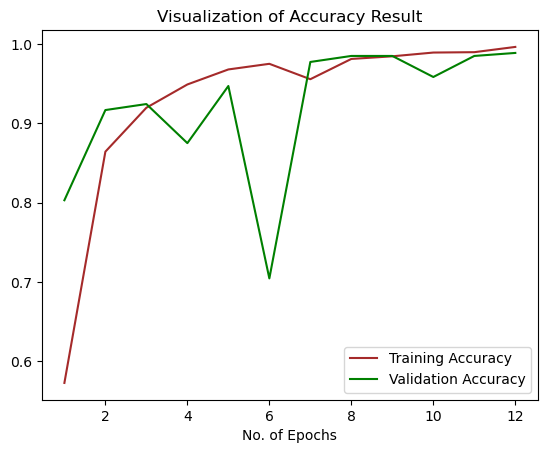

In [16]:
epochs = [i for i in range(1,13)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()